In [29]:
import pickle

with open('100.pickle', 'rb') as handle:
    one = pickle.load(handle)
with open('200.pickle', 'rb') as handle:
    two = pickle.load(handle)
with open('300.pickle', 'rb') as handle:
    three = pickle.load(handle)
with open('400.pickle', 'rb') as handle:
    four = pickle.load(handle)
with open('500.pickle', 'rb') as handle:
    five = pickle.load(handle)


In [30]:
type(one)

dict

In [31]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1))
Merge(one, two)

In [38]:
Merge(five, two)

In [40]:
final = two

In [60]:
def get_cm_id(search_dict):
    isrc_dict = {}
    for k, v in search_dict.items():
        try:
            obj_ind = v['obj']
            if not obj_ind['tracks']:
                pass
            else:
                cm_id = obj_ind['tracks'][0]['id']
                name_of_song = v["obj"]["tracks"][0]["name"]
                isrc_dict[name_of_song] = dict(cm_id=cm_id, isrc=k)
    #         time.sleep(5)
        except TypeError:
            print(f'{k} not found')
#             time.sleep(5)

    return isrc_dict

In [61]:
new_stuff = get_cm_id(final)

USAT21901061 not found
USAT21901997 not found
USAT21901994 not found
US39N1900008 not found
USAT21901998 not found
USAT21901841 not found
USAT21901838 not found
USAT21901999 not found
USAT21902001 not found
USAT21902118 not found
USAT21901839 not found
USAT21901840 not found
US39N1900009 not found
USAT21901996 not found
CHB701800117 not found

USRC17007997
 not found
USWB11901111 not found
BRWMB1900781 not found
BRWMB1900780 not found
BRWMB1900777 not found
BRWMB1900779 not found
BRWMB1900782 not found
BRWMB1900785 not found
BRWMB1900786 not found
USRC11803644 not found
USRC11803646 not found
USAT21802943 not found
USAT21802903 not found
USAT21802930 not found
GBAYE1800627 not found
GBAHS1800467 not found
USAT21802940 not found
USAT21802937 not found
USAT21802927 not found
USAT21802936 not found
USAT21802928 not found
USAT21802932 not found
GBAYE1800628 not found
USAT21802934 not found
USAT21802926 not found
USAT21802925 not found
USAT21802924 not found
USAT21802929 not found
USAT21802

In [68]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(150, new_stuff.items())


In [66]:
from client import Chartmetric
from config import chartmetric_token
import time
cm = Chartmetric(chartmetric_token)
from tqdm import tqdm
song_data_dict = {}
for k, v in tqdm(new_stuff.items()):
    song_data_dict[k] = cm.track(str(v['cm_id']))
    time.sleep(4)

 58%|█████▊    | 176/306 [14:18<10:14,  4.73s/it]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [67]:
song_data_dict

{'Overkill': {'obj': {'id': 15812021,
   'name': 'Overkill',
   'isrc': 'USSM18200071',
   'image_url': 'https://i.scdn.co/image/0bb71c03a9fe2b8c2faadd6fe97f24169abd09a2',
   'duration_ms': 229466,
   'composer_name': 'Colin Hay',
   'artists': [{'id': 476,
     'name': 'Men At Work',
     '_delete_mbid': '395cc503-63b5-4a0b-a20a-604e3fcacea2',
     'image_url': None,
     'cover_url': None,
     'code2': 'AU',
     'gender': 1,
     'isni': None,
     'description': None,
     'created_at': '2016-11-25',
     'hometown_city': None,
     'current_city': None,
     'date_of_birth': '1979-01-01',
     'date_of_death': '1985-01-01'}],
   'albums': [{'id': 129422,
     'name': 'The Best Of Men At Work',
     'upc': '5099751909125',
     'release_date': '2005-01-31T00:00:00.000Z',
     'label': 'Sony Music Entertainment',
     'image_url': 'https://i.scdn.co/image/440945ae1b90c2eda8ba0b527081c98ed33daad3',
     'popularity': 36},
    {'id': 190656,
     'name': 'Playlist: The Very Best Of M

In [86]:
import pandas as pd
import numpy as np
song_features_dict = {} 
for k, v in song_data_dict.items():
    song_features_dict[k] = v['obj']['cm_audio_features']
feature_df = pd.DataFrame.from_dict(song_features_dict).T
feature_df.drop(columns=["key", "loudness", "mode", "tempo"], inplace=True)

In [87]:
def sim_function(x, y):
    return 1. / (1. + np.linalg.norm(x - y, 2))

In [88]:
n = len(feature_df.dropna())
sim_song = {}
X = np.zeros((n, 7))

for i in range(n):
    X[i] = feature_df.dropna().iloc[i]
    
for i in range(n):
    x = feature_df.dropna().iloc[i]
    sim_song[x.name] = 0
    buffer = 0
    for j in range(n):
        if i == j:
            continue
            
        y = feature_df.dropna().iloc[j]
        
        sim = sim_function(x, y)
        if sim > buffer:
            sim_song[x.name] = y.name
            buffer = sim

In [91]:
feature_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Overkill,0.13,0.66,0.816,0,0.139,0.0353,0.637
Free Ride,0.368,0.689,0.839,0.139,0.373,0.1,0.798
Jessie's Girl,0.331,0.728,0.853,0,0.123,0.0605,0.874
Two Tickets To Paradise,0.199,0.595,0.898,0.0375,0.115,0.0518,0.707
Flirtin' with Disaster,0.00163,0.273,0.823,0.0438,0.191,0.0471,0.73


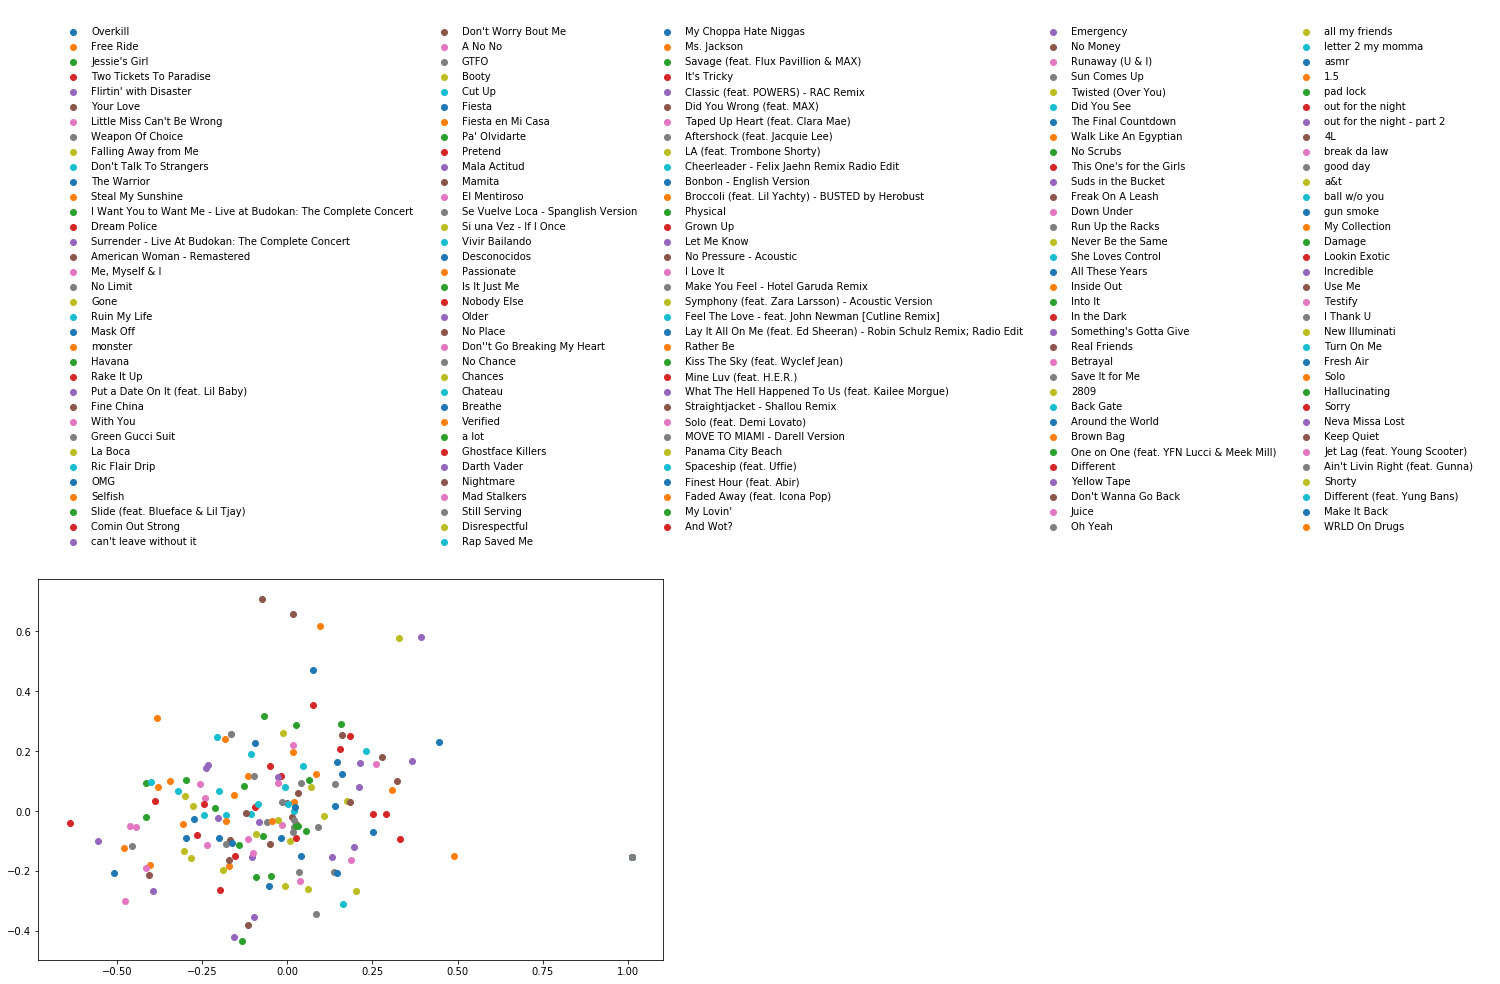

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA(n_components=2)
pca.fit(X)

z = pca.transform(X)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7 * 1.6, 7))
for i, vec in enumerate(z):
    ax.scatter(vec[0], vec[1], label=feature_df.dropna().iloc[i].name)
plt.legend(loc="best", ncol=5, bbox_to_anchor=(0, 1.02, 1, 0.102),
          frameon=False, borderpad=2)
plt.show()

In [101]:
song_data_dict["""And Wot?"""]['obj']['cm_statistics']

{'num_sp_playlists': 94,
 'num_sp_editorial_playlists': 1,
 'num_am_playlists': 9,
 'num_am_editorial_playlists': 1,
 'num_de_playlists': 0,
 'num_de_editorial_playlists': 0,
 'num_az_playlists': 0,
 'num_az_editorial_playlists': 0,
 'num_yt_playlists': 1,
 'num_yt_editorial_playlists': 1,
 'yt_playlist_total_reach': '416338',
 'sp_popularity': 32,
 'sp_playlist_total_reach': '98901',
 'de_playlist_total_reach': None}